# Runner

In [23]:
# initialize variables
%load_ext autoreload
%autoreload 2
import os
from players.daniel import Player
from util.runner import run_episode
from players.ava import QLearning
from players.tanay import TicTacTanay
from players.minimax import Minimax
import matplotlib.pyplot as plt
import numpy as np
import torch
gamma = 1
illegal_penalty = 0.3
passive = 0.3
draw = 1
player1 = Player(board_length=3, gamma=gamma, lr=0.001, passive=passive, draw=draw, illegal=illegal_penalty)
player2 = Minimax()
game_lengths = []
visible_buffer_games=1
invisible_games=20000
player1.training = True
player1.points = 0
player2.points = 0

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Player 1 First

Player 1 First Games:
Illegal move detected.
AI 1 attempted to play a move at (0, 1)


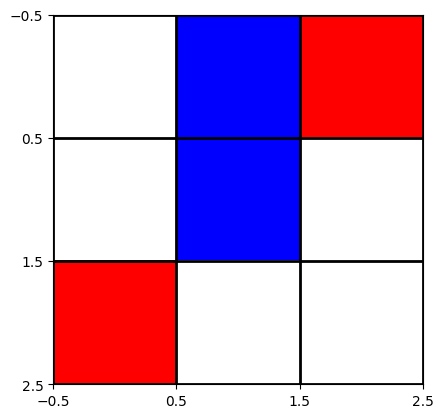

player 2 won
Invisible Games Playing...
[0.3, 0.3, 0.3, -0.3]
Result.ILLEGAL -0.3
[0.3, -0.3]
Result.ILLEGAL -0.3
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 0.3, 1]
Result.DRAW 1


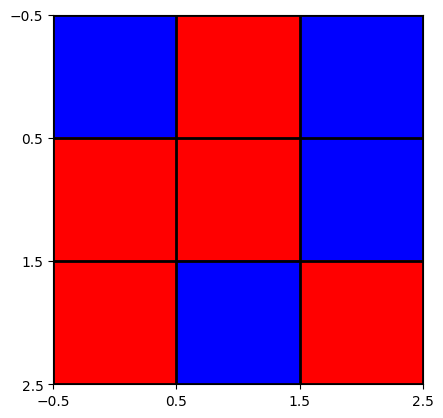

game was drawn


In [21]:
# PLAYER 1 GAMES
print("Player 1 First Games:")
for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player1, second=player2)

print("Invisible Games Playing...")
avg_len = 50
sum = 0
for x in range(invisible_games):
  sum += run_episode(verbose=False, first=player1, second=player2)
  if (x + 1) % avg_len == 0:
    game_lengths.append(sum / avg_len)
    sum = 0
for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player1, second=player2)


# Player 2 First

Player 2 First Games:
Illegal move detected.
AI 2 attempted to play a move at (0, 1)


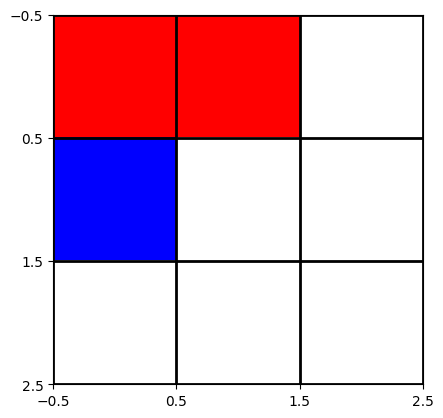

player 1 won
Invisible Games Playing...
[0.3, -0.3]
Result.ILLEGAL -0.3
[0.3, 0.3, -0.3]
Result.ILLEGAL -0.3
[0.3, -1]
Result.LOSS -1
[0.3, -0.3]
Result.ILLEGAL -0.3
[0.3, 0.3, -0.3]
Result.ILLEGAL -0.3
[0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 1]
Result.DRAW 1
[0.3, 0.3, 0.3, 1]
Result.DRAW 1


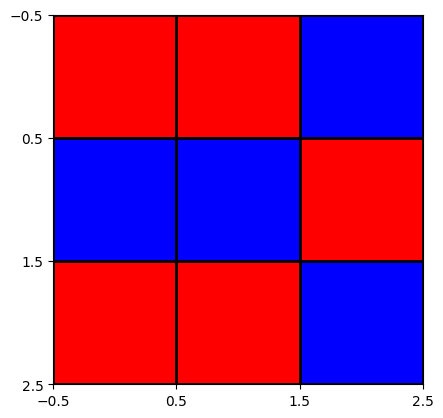

game was drawn


In [24]:
# PLAYER 2 GAMES
print("Player 2 First Games:")
for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player2, second=player1, train=True)

print("Invisible Games Playing...")
avg_len = 50
sum = 0
for x in range(invisible_games):
  sum += run_episode(verbose=False, first=player2, second=player1, train=True)
  if (x + 1) % avg_len == 0:
    game_lengths.append(sum / avg_len)
    sum = 0

for x in range(visible_buffer_games):
  run_episode(verbose=True, first=player2, second=player1, train=True)

# Post-Evaluation

Player 1 Points: 15476
Player 2 Points: 24528
Game Over


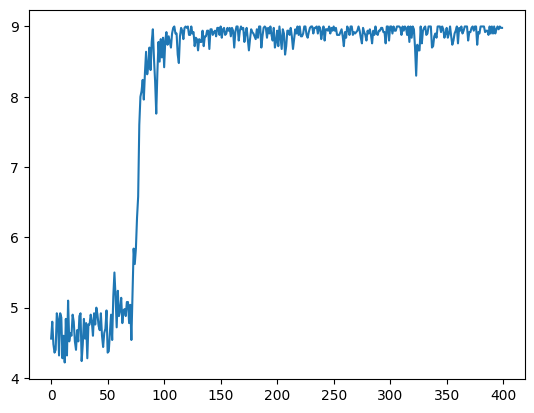

In [22]:
print("Player 1 Points:", player1.points)
print("Player 2 Points:", player2.points)
print("Game Over")
# folder = f"model/{player1.points}/"
# os.mkdir(folder)
plt.plot(np.arange(len(game_lengths)), game_lengths)
# plt.savefig(folder + "game_lengths.png")
plt.show()
# torch.save(player1.nn.state_dict(), folder + "state_dict.pt")
# f = open(folder + "metadata.txt", "w")
# f.write(
#   f"""
# Player 1 Points: {player1.points}
# Player 2 Points: {player2.points}
# gamma: {gamma}
# illegal_penalty: {illegal_penalty}
# draw: {draw}
# passive: {passive}
#   """)
# f.close()
# plt.plot(np.arange(len(player1.R)), player1.R)

In [232]:
torch.log(torch.tensor(torch.e))

tensor(1.0000)

In [231]:
torch.tensor([1, 2, 3]) * torch.tensor([1, 2, 3])

tensor([1, 4, 9])